Supposed to be chapter 3 but will change later

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

In [4]:
img = cv2.imread("elephant.jpg")

#Linear filters
Observe the effect of box and gaussian filter on smoothing an image

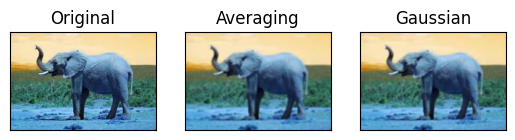

In [ ]:
#box filter
box = cv2.blur(img, (3, 3))

#Gaussian kernel
Gaussian = cv2.GaussianBlur(img, (3, 3), 0)

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(box),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(Gaussian),plt.title('Gaussian')
plt.xticks([]), plt.yticks([])
plt.show()

Unsharp masking

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

filtering = median_filter(gray, 1)

#approximation to (f - h_{blur} * f)
laplacian = cv2.Laplacian(filtering, cv2.CV_64F)

#observe the effect on detecting edges
gamma = 1.5
sharpened = gray - gamma * laplacian

cv2.imshow("sharpened", sharpened)
cv2.waitKey(0)

-1

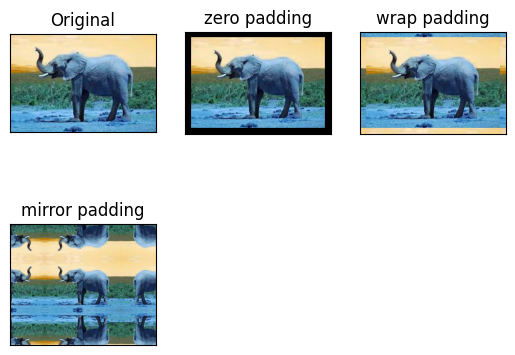

In [ ]:
#zero_padding
zero_padded = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT)

#constant padding
blue = (255, 0, 0)
constant_padded = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value = blue)


#clamp padding ----

#wrap padding (toroidal configuration) 
wrap_padded = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_WRAP)

#mirror padding - works well for padding of about 10 but returns strange results beyong that
mirror_padded_border = cv2.copyMakeBorder(img, 100, 100, 100, 100, cv2.BORDER_REFLECT)

#extend padding - have to implement manually


""" #constant padding shows with opencv not with matplotlib
cv2.imshow("constant padding", constant_padded)
cv2.waitKey(0) """

plt.subplot(231),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(zero_padded),plt.title('zero padding')
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(wrap_padded),plt.title('wrap padding')
plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(mirror_padded_border),plt.title('mirror padding')
plt.xticks([]), plt.yticks([])
plt.show()

Use steerable filters to find edge and corner features